In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
data_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
data_boston['PRICE'] = boston.target
# print(data_boston.head())
# print(data_boston.tail())

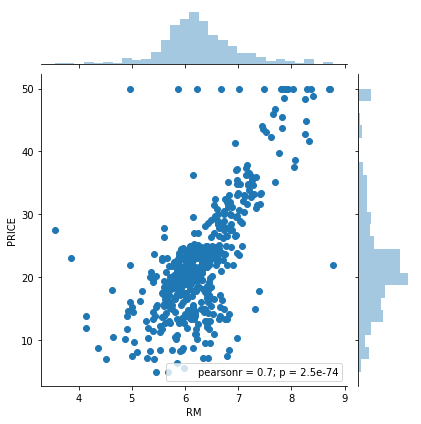

In [5]:
sns.jointplot('RM', 'PRICE', data=data_boston)

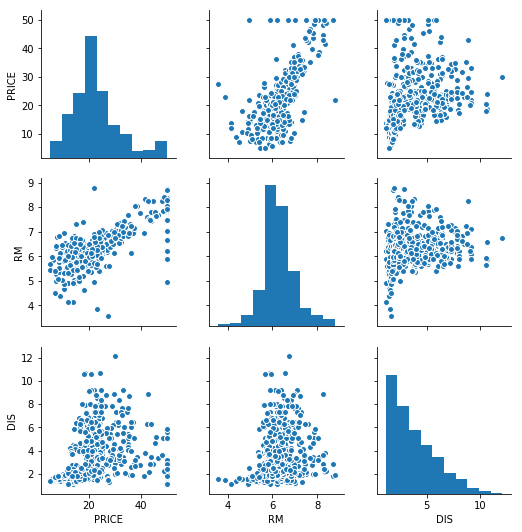

In [6]:
sns.pairplot(data_boston, vars=['PRICE', 'RM', 'DIS'])

In [7]:
lr = LinearRegression()

x_column_list = ['RM']
y_column_list = ['PRICE']

data_boston_x = data_boston[x_column_list]
data_boston_y = data_boston[y_column_list]

lr.fit(data_boston_x, data_boston_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
print(lr.coef_)
print(lr.intercept_)

[[ 9.10210898]]
[-34.67062078]


In [9]:
lr_multi = LinearRegression()

x_column_list_for_multi = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
y_column_list_for_multi = ['PRICE']

data_boston_x = data_boston[x_column_list_for_multi]
data_boston_y = data_boston[y_column_list_for_multi]

lr_multi.fit(data_boston_x, data_boston_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print(lr_multi.coef_)
print(lr_multi.intercept_)

[[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
   -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
    3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
   -5.25466633e-01]]
[ 36.49110328]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_boston_x, data_boston_y, test_size=0.3, random_state=123)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


In [13]:
lr_multi2 = LinearRegression()

lr_multi2.fit(X_train, y_train)
print(lr_multi2.coef_)
print(lr_multi2.intercept_)

[[ -9.91175764e-02   3.98961440e-02   7.58808441e-02   2.68496383e-01
   -1.43760936e+01   4.82629726e+00  -7.35806317e-03  -1.32647165e+00
    2.72550036e-01  -1.30406609e-02  -9.57594445e-01   6.53504154e-03
   -4.87745078e-01]]
[ 29.02327089]


In [14]:
y_pred = lr_multi2.predict(X_test)

In [15]:
print(y_pred)

[[ 15.51921361]
 [ 27.86233683]
 [ 39.71779744]
 [ 17.94255214]
 [ 30.19292774]
 [ 37.48672957]
 [ 25.21136428]
 [ 11.24755593]
 [ 13.9365023 ]
 [ 32.10625496]
 [ 28.51903345]
 [ 19.1024797 ]
 [ 14.1468027 ]
 [ 30.6142138 ]
 [ 16.90817177]
 [ 21.57918426]
 [ 20.56464864]
 [ 38.03400078]
 [ 18.28493553]
 [ 15.4390425 ]
 [ 13.93063134]
 [ 22.89432872]
 [ 33.08507506]
 [ 38.86090149]
 [ 29.92038175]
 [ 22.33017215]
 [ 17.85661709]
 [ 20.65938821]
 [ 23.38112056]
 [ 20.47701418]
 [ 25.78540679]
 [ 33.83843136]
 [ 15.33856627]
 [ 21.79091207]
 [ 24.14899568]
 [ 35.20395606]
 [ 29.21116452]
 [ 18.55500037]
 [ 13.95622678]
 [ 38.63140318]
 [ 31.18019571]
 [ 19.10841951]
 [ 19.13017887]
 [ 39.76386999]
 [  8.85608926]
 [ 27.28587811]
 [ 19.04946579]
 [ 25.4552507 ]
 [ 15.49883732]
 [ 26.18624884]
 [ 33.70374497]
 [ 24.39950731]
 [ 19.39894872]
 [ 12.5404461 ]
 [ 24.51447481]
 [ 18.19486761]
 [ 10.61714786]
 [  2.28442931]
 [ 31.71651272]
 [ 13.45620813]
 [ 20.09966789]
 [ 22.39281155]
 [ 19.95

In [16]:
print(y_pred - y_test)

PRICE
410   0.519214
85    1.262337
280  -5.682203
422  -2.857448
199  -4.707072
364  15.586730
5    -3.488636
415   4.047556
209  -6.063498
284  -0.093745
201   4.419033
337   0.602480
34    0.646803
160   3.614214
495  -6.191828
11    2.679184
494  -3.935351
261  -5.065999
317  -1.515064
474   1.639042
134  -1.669369
372 -27.105671
179  -4.114925
282  -7.139099
369 -20.079618
485   1.130172
458   2.956617
59    1.059388
332   3.981121
102   1.877014
..         ...
286   0.118614
437   1.643282
20   -1.508896
120   0.770616
242   1.985517
335  -0.362195
142  -0.342464
170   5.635032
241   3.221230
379   6.701803
367 -14.340570
388  -4.564169
156   1.831948
433   3.893043
31    3.382762
401  10.807913
21   -2.170608
484  -1.304269
164   2.189617
184  -4.799233
416   7.786536
79    1.929289
370 -17.874219
397   7.381764
121   3.064858
310   1.605012
91    5.066604
151  -0.740738
426   6.690305
472  -0.742861

[152 rows x 1 columns]


In [17]:
from sklearn.metrics import mean_absolute_error

x_column_list = ['RM']
y_column_list = ['PRICE']

X_train, X_test, y_train, y_test = train_test_split(data_boston[x_column_list], data_boston[y_column_list], test_size=0.3)

lr_single = LinearRegression()

lr_single.fit(X_train, y_train)
y_pred = lr_single.predict(X_test)

print(mean_absolute_error(y_pred, y_test))

4.5237479604


In [19]:
x_column_list_for_multi = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
y_column_list_for_multi = ['PRICE']

X_train, X_test, y_train, y_test = train_test_split(data_boston[x_column_list_for_multi], data_boston[y_column_list_for_multi], test_size=0.3)

lr_multi2 = LinearRegression()

lr_multi2.fit(X_train, y_train)
y_pred = lr_multi2.predict(X_test)

print(mean_absolute_error(y_pred, y_test))

3.34326554261
